# Data Science Academy
# Mini-Projeto 3
# Análise Estatística de Dados com NumPy Para a Área de Marketing

## 1. Definição do Problema de Negócio

### 1.1. Contexto

Uma plataforma de e-commerce coleta um volume significativo de dados sobre a interação dos usuários com o site, incluindo o número de visitas, a duração da sessão, a atividade de adição de produtos ao carrinho e os valores de compra finalizados. No entanto, esses dados estão sendo subutilizados. Atualmente, as decisões sobre campanhas de marketing, promoções e melhorias na experiência do usuário (UX) são tomadas com base em intuição e métricas de alto nível, sem uma compreensão aprofundada dos padrões de comportamento que impulsionam os resultados.

### 1.2. Problema de Negócio

A empresa enfrenta o desafio de compreender profundamente os padrões de comportamento que diferenciam os clientes de alto valor dos visitantes que abandonam o site sem comprar. Essa falta de clareza resulta em:

- Marketing Genérico: Nossas campanhas de marketing são de "tamanho único", resultando em baixo engajamento e desperdício de orçamento, pois não conseguimos personalizar as ofertas para os segmentos de clientes corretos.

- Perda de Oportunidades: Não conseguimos identificar e engajar proativamente os clientes com maior potencial de compra ou criar estratégias para converter os visitantes que demonstram interesse, mas não finalizam a compra.

- Decisões Não Embasadas: As estratégias de produto e de experiência do usuário carecem de uma base quantitativa sólida sobre quais comportamentos (ex: tempo no site, frequência de visitas) estão mais fortemente correlacionados com o sucesso das vendas.

### 1.3. Objetivo Principal

Utilizar a análise estatística dos dados de navegação e compra para segmentar clientes, identificar os principais indicadores de comportamento que levam à conversão e fornecer insights acionáveis para as equipes de marketing e produto, a fim de aumentar o ticket médio e a taxa de conversão geral da plataforma.

### 1.4. Perguntas-Chave a Serem Respondidas

A análise de dados deve responder às seguintes perguntas críticas de negócio:

- 1- Qual é o perfil médio do nosso usuário em termos de visitas, tempo de navegação e valor de compra (ticket médio)?

- 2- Quais são as características e comportamentos distintos dos nossos clientes de "Alto Valor"? Eles visitam mais o site? Passam mais tempo navegando?

- 3- Qual é o comportamento dos usuários que visitam o site, mas não realizam nenhuma compra? Onde está a oportunidade de conversão com este grupo?

- 4- Existe uma correlação estatisticamente relevante entre o tempo gasto no site, o número de itens no carrinho e o valor final da compra?

### 1.5. Resultado Esperado e Impacto no Negócio

O resultado deste projeto será um relatório de análise estatística que permitirá:

- Segmentação Aprimorada: Criação de pelo menos dois segmentos de clientes (ex: "Clientes de Alto Valor" e "Visitantes Engajados sem Compra") para direcionamento de campanhas de marketing personalizadas.

- Otimização de Marketing: Direcionar o orçamento de marketing para ações focadas nos comportamentos que mais se correlacionam com compras de alto valor, aumentando o Retorno Sobre o Investimento (ROI).

- Melhoria da Experiência do Usuário (UX): Fornecer à equipe de produto dados que possam justificar testes A/B ou melhorias em áreas do site frequentadas por usuários que não convertem.

## 2. Importação das Bibliotecas

In [36]:
# Importando a biblioteca NumPy
import numpy as np

In [37]:
# Outros Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Definir uma semente para reprodutibilidade dos resultados
np.random.seed(42)

In [39]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [40]:
%watermark --iversions

matplotlib: 3.10.8
numpy     : 2.4.2
pandas    : 3.0.0
platform  : 1.0.9
seaborn   : 0.13.2



## 3. Função Para Geração de Dados Fictícios

Vamos criar um conjunto de dados para 500 usuários. Cada usuário terá 4 métricas associadas descritas abaixo.

- visitas: Número de vezes que o usuário visitou o site no mês.

- tempo_no_site: Tempo total em minutos que o usuário passou no site.

- itens_no_carrinho: Número de itens que o usuário adicionou ao carrinho.

- valor_compra: O valor total em R$ da compra realizada pelo usuário no mês.

In [41]:
# Definir o número de usuários
num_usuarios = 500

In [42]:
# 1. Gerar o número de visitas (entre 1 e 50)
visitas = np.random.randint(1, 51, size=num_usuarios)

A distribuição normal é um tipo de distribuição de probabilidade contínua, simétrica em torno da média, com formato característico de sino. Nesse tipo de distribuição os valores próximos da média são mais frequentes e a probabilidade de observar valores extremos diminui gradualmente conforme se afastam do centro. É definida por dois parâmetros: a média (que indica o centro da distribuição) e o desvio padrão (que indica a dispersão dos dados). É muito usada em Estatística e Ciência de Dados porque muitos fenômenos naturais e sociais tendem a seguir esse padrão.

In [43]:
# 2. Gerar o tempo no site (distribuição normal, correlacionado com as visitas)
# Média de 20 min, desvio padrão de 5, com um bônus por visita
tempo_no_site = np.random.normal(loc=20, scale=5, size=num_usuarios) + (visitas * 0.5)
tempo_no_site = np.round(tempo_no_site, 2)  # Arredondar para 2 casas decimais

In [44]:
# 3. Gerar o número de itens no carrinho (dependente das visitas e do tempo)
# Usuários que visitam mais e passam mais tempo, tendem a adicionar mais itens
itens_no_carrinho = np.random.randint(0, 8, size=num_usuarios) + (visitas // 10)

In [45]:
# Garante que o tempo no site também influencie positivamente
itens_no_carrinho = (itens_no_carrinho + (tempo_no_site // 15)).astype(int)

In [46]:
# 4. Gerar o valor da compra (correlacionado com os itens no carrinho)
# Preço médio por item de R$ 35, com alguma variação aleatória
valor_compra = (itens_no_carrinho * 35) + np.random.normal(
    loc=0, scale=10, size=num_usuarios
)

In [47]:
type(valor_compra)

numpy.ndarray

In [48]:
type(itens_no_carrinho)

numpy.ndarray

In [49]:
# Se não houver itens no carrinho, o valor da compra deve ser 0
valor_compra[itens_no_carrinho == 0] = 0
valor_compra[valor_compra < 0] = 0 # Corrigir valores negativos que possam surgir
valor_compra = np.round(valor_compra, 2)

In [50]:
# Unindo tudo em uma única matriz (ndarray)
# Cada linha representa um usuário, cada coluna uma métrica
dados_ecommerce = np.column_stack(
    (visitas, tempo_no_site, itens_no_carrinho, valor_compra)
)

In [51]:
print("\nShape da nossa massa de dados:", dados_ecommerce.shape)
print("\nExemplo dos 5 primeiros usuários (linhas):")
print(
    "\nColunas: [Visitas, Tempo no Site (min), Itens no Carrinho, Valor da Compra (R$)]\n"
)
print(dados_ecommerce[:5])


Shape da nossa massa de dados: (500, 4)

Exemplo dos 5 primeiros usuários (linhas):

Colunas: [Visitas, Tempo no Site (min), Itens no Carrinho, Valor da Compra (R$)]

[[ 39.    23.29   9.   314.54]
 [ 29.    29.38   5.   177.43]
 [ 15.    26.24   6.   207.59]
 [ 43.    35.26   8.   283.52]
 [  8.    32.16   3.    92.48]]


## 4. Análise Estatística Descritiva

Agora que temos os dados, vamos calcular as principais métricas estatísticas para cada coluna para ter uma visão geral do comportamento dos nossos usuários.

- A média é a soma de todos os valores dividida pela quantidade de elementos. Ela indica o valor “central” ou típico de um conjunto de dados.

- A mediana é o valor que fica exatamente no meio quando os dados estão ordenados. Se houver um número par de valores, é a média dos dois valores centrais. Ela é menos sensível a valores muito extremos do que a média.

- O desvio padrão mede o quanto os valores se afastam, em média, da média do conjunto. Um desvio padrão alto significa que os dados são mais espalhados; um baixo indica que estão mais próximos da média.

### Pergunta 1

Qual é o perfil médio do nosso usuário em termos de visitas, tempo de navegação e valor de compra (ticket médio)?

In [52]:
# Separando as colunas para facilitar a leitura do código
visitas_col = dados_ecommerce[:, 0]
tempo_col = dados_ecommerce[:, 1]
itens_col = dados_ecommerce[:, 2]
valor_col = dados_ecommerce[:, 3]

print("--- ANÁLISE ESTATÍSTICA GERAL ---")

# Média
media_visitas = np.mean(visitas_col)
media_tempo = np.mean(tempo_col)
media_itens = np.mean(itens_col)
media_valor = np.mean(valor_col)

print(f"\nMédia de Visitas: {media_visitas:.2f}")
print(f"Média de Tempo no Site: {media_tempo:.2f} min")
print(f"Média de Itens no Carrinho: {media_itens:.2f}")
print(f"Média de Valor de Compra (Ticket Médio): R$ {media_valor:.2f}")

# Mediana (valor central, menos sensível a outliers)
mediana_valor = np.median(valor_col)
print(f"\nMediana do Valor de Compra: R$ {mediana_valor:.2f}")

# Desvio Padrão (mede a dispersão dos dados)
std_valor = np.std(valor_col)
print(f"Desvio Padrão do Valor de Compra: R$ {std_valor:.2f}")

# Valores Máximos e Mínimos
max_valor = np.max(valor_col)
min_valor_positivo = np.min(
    valor_col[valor_col > 0]
)  # Mínimo apenas entre quem comprou
print(f"Maior Valor de Compra: R$ {max_valor:.2f}")
print(f"Menor Valor de Compra (de quem comprou): R$ {min_valor_positivo:.2f}")

--- ANÁLISE ESTATÍSTICA GERAL ---

Média de Visitas: 25.86
Média de Tempo no Site: 32.78 min
Média de Itens no Carrinho: 7.20
Média de Valor de Compra (Ticket Médio): R$ 252.70

Mediana do Valor de Compra: R$ 248.13
Desvio Padrão do Valor de Compra: R$ 106.94
Maior Valor de Compra: R$ 530.37
Menor Valor de Compra (de quem comprou): R$ 23.42


Este gráfico abaixo mostra o histograma dos valores de compra com linhas verticais indicando a média (vermelho), a mediana (laranja) e o intervalo de um desvio padrão acima e abaixo da média (linhas verdes). Isso facilita a análise de como os dados estão distribuídos e se existem possíveis outliers ou assimetrias.

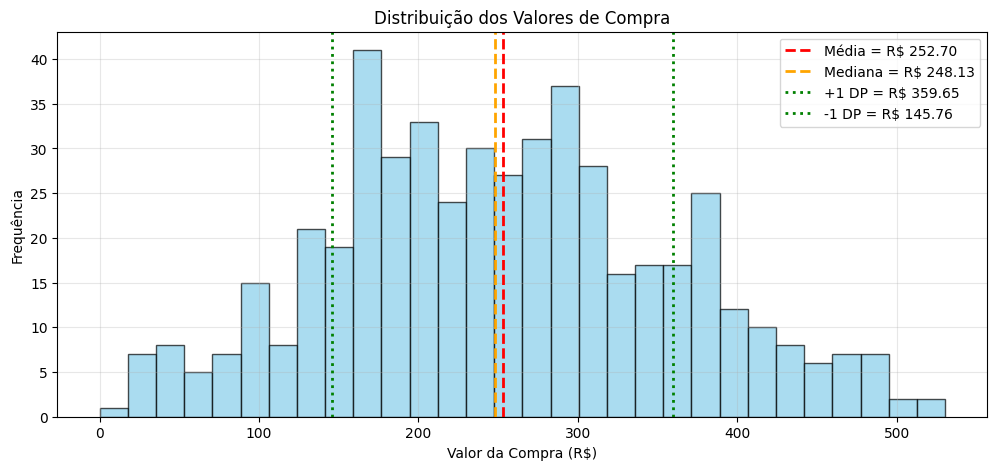

In [53]:
# Separando colunas
visitas_col = dados_ecommerce[:, 0]
tempo_col = dados_ecommerce[:, 1]
itens_col = dados_ecommerce[:, 2]
valor_col = dados_ecommerce[:, 3]

# Calculando as Estatísticas
media_valor = np.mean(valor_col)
mediana_valor = np.median(valor_col)
std_valor = np.std(valor_col)

# --- GRÁFICO ---
plt.figure(figsize=(12, 5))
plt.hist(valor_col, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.axvline(
    media_valor,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Média = R$ {media_valor:.2f}",
)
plt.axvline(
    mediana_valor,
    color="orange",
    linestyle="--",
    linewidth=2,
    label=f"Mediana = R$ {mediana_valor:.2f}",
)
plt.axvline(
    media_valor + std_valor,
    color="green",
    linestyle=":",
    linewidth=2,
    label=f"+1 DP = R$ {media_valor + std_valor:.2f}",
)
plt.axvline(
    media_valor - std_valor,
    color="green",
    linestyle=":",
    linewidth=2,
    label=f"-1 DP = R$ {media_valor - std_valor:.2f}",
)
plt.title("Distribuição dos Valores de Compra")
plt.xlabel("Valor da Compra (R$)")
plt.ylabel("Frequência")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Resposta da Pergunta 1:**

O usuário acessa o site, em média, cerca de 26 vezes por mês, permanece em média 33 minutos navegando, adiciona aproximadamente 7 itens ao carrinho e realiza compras com ticket médio de R$ 252,70. 

O gasto típico fica próximo da mediana de R$ 248,13.

Mas há grande variação entre clientes, alguns compram valores baixos a partir de R$ 23,42. 

Enquanto outros chegam a gastar até R$ 530,37.

## 5. Segmentação e Análise de Clientes

Vamos usar a indexação booleana para filtrar e analisar segmentos específicos de clientes.

### Pergunta 2

Quais são as características e comportamentos distintos dos nossos clientes de "Alto Valor"? Eles visitam mais o site? Passam mais tempo navegando?

In [ ]:
# Filtro booleano para clientes com compras > R$ 250
clientes_alto_valor = dados_ecommerce[dados_ecommerce[:, 3] > 250]

print("\n--- ANÁLISE: CLIENTES DE ALTO VALOR (Compras > R$ 250) ---\n")
print(f"Número de clientes de alto valor: {clientes_alto_valor.shape[0]}")

# Estatísticas deste segmento
media_visitas_alto_valor = np.mean(clientes_alto_valor[:, 0])
media_tempo_alto_valor = np.mean(clientes_alto_valor[:, 1])

print(f"Média de visitas desses clientes: {media_visitas_alto_valor:.2f}")
print(f"Média de tempo no site desses clientes: {media_tempo_alto_valor:.2f} min")

**Resposta da Pergunta 2:**

Os clientes de alto valor (aqueles que gastam mais de R$ 250) visitam o site com maior frequência, em média 33 vezes por mês, e permanecem mais tempo navegando, cerca de 37 minutos por sessão. Esse comportamento indica um alto nível de engajamento, sugerindo que quanto mais esses usuários interagem com a plataforma, maior tende a ser o valor de suas compras.

### Pergunta 3

Qual é o comportamento dos usuários que visitam o site, mas não realizam nenhuma compra? Onde está a oportunidade de conversão com este grupo?

In [ ]:
# Filtro para visitantes que não compraram
visitantes_sem_compra = dados_ecommerce[dados_ecommerce[:, 3] == 0]

print("\n--- ANÁLISE: VISITANTES QUE NÃO COMPRAM ---\n")
print(f"Número de visitantes que não compraram: {visitantes_sem_compra.shape[0]}")

# Estatísticas deste segmento
media_tempo_sem_compra = np.mean(visitantes_sem_compra[:, 1])
media_visitas_sem_compra = np.mean(visitantes_sem_compra[:, 0])

print(f"Média de visitas desses visitantes: {media_visitas_sem_compra:.2f}")
print(
    f"Apesar de não comprarem, eles passam em média {media_tempo_sem_compra:.2f} min no site."
)


--- ANÁLISE: VISITANTES QUE NÃO COMPRAM ---

Número de visitantes que não compraram: 1
Média de visitas desses visitantes: 7.00
Apesar de não comprarem, eles passam em média 14.71 min no site.


**Resposta da Pergunta 3:**

Os usuários que não realizam compras visitam o site em média 7 vezes e permanecem cerca de 15 minutos navegando, mas não finalizam nenhuma transação. Esse comportamento mostra que, mesmo com algum nível de interesse, eles acabam desistindo antes da compra, representando uma oportunidade para ações de remarketing, otimização do checkout e estratégias de incentivo, como descontos ou frete grátis, para aumentar a conversão.